In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()

In [3]:
url = 'https://www.naver.com/'
driver.get(url)

In [24]:
# 검색어 및 검색 기간 설정
search_word = "삼성전자"
start_date="2024.04.10"
end_date="2024.04.17"

base_url = f'https://search.naver.com/search.naver?where=news&query={search_word}&sm=tab_opt&sort=0&photo=3&field=0&pd=3&ds={start_date}&de={end_date}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{start_date.replace(".","")}to{end_date.replace(".","")}&is_sug_officeid=0&office_category=0&service_area=0'

In [32]:
driver.get(base_url)

In [33]:
import time
# 스크롤 자동으로 내리기
for i in range(30):
    time.sleep(2)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [34]:
# 뷰티풀숲으로 현재 페이지 크롤링
from bs4 import BeautifulSoup
import requests
html = driver.page_source
# 파싱
soup = BeautifulSoup(html, 'html.parser')

In [35]:
# 뉴스 본문 url과 뉴스 title 가져오기
title = [t.text for t in soup.select('a.news_tit')]
urls = soup.select('a.info')
url_naver = []

## 반복문을 사용해서 해당 title 과 url 정보만 파싱
for i in range(len(urls)):
    if 'naver' in urls[i]['href']:
        url_naver.append(urls[i]['href'])

In [36]:
title

['경계현 삼성전자 사장 “美 반도체 공급망 강화에 기여”',
 '삼성전자, 美 텍사스에 반도체 단지… 보조금 64억 달러 받는다',
 '"삼성은 TSMC와 다르다"…美 \'보조금 9조\' 초특급 대우',
 '美, 삼성에 보조금 8.8조원 파격 지원',
 '삼성·LG전자, 밀라노 디자인위크로…"가전, 인테리어가 되다"',
 '삼성전자 스마트폰… 애플 제치고 1위 탈환',
 '삼성전자, 미국서 보조금 9조 땄지만…현지 반도체 승기 잡아야',
 '美 반도체보조금 삼성 9조 받는다[美, 삼성전자에 보조금 64억弗 지원]',
 '삼성전자, 1분기 세계 스마트폰 시장 1위 탈환',
 '삼성전자, AI 수요 대응 위해 업계 최고 속도 LPDDR5X 개발',
 '삼성전자, AI 수요 대응 위해 업계 최고 속도 LPDDR5X 개발',
 '美국방부 손잡은 삼성…엔비디아 AI칩 수주 가능성',
 '삼성전자, 스마트폰 선두 탈환',
 '[재계뒷담] 간접흡연 피해 일으키는 삼성전자 연구타워',
 '삼성전자 주식 몇년 보유할 때 수익률 최고?…66만 계좌 분석해 보니',
 '[단독] 삼성전자 “납품 단가 부풀려” 前임직원 배임으로 고소',
 '한종희 삼성전자 부회장 "하반기 생활가전 웃을 듯…애플도 겨뤄볼만"',
 '이건희 밀라노 선언 20년 만에… 삼성전자 다시 디자인 강조',
 "[WIS 2024]삼성전자, 일상 속 스며든 '갤럭시 AI' 라이프 선보여",
 '삼성전자 "올해 갤럭시S24 판매로 재활용 플라스틱 100톤 사용"',
 "2만원짜리 1만9900원에 팔면 '훨씬 싸다'고 느끼는 이유",
 '삼성전자, 美 마이애미에 개인 맞춤형 스마트홈 구축',
 '삼성전자, 개인 맞춤형 스마트홈 추진...美 플로우와 협력',
 "삼성전자, AI시대 디자인 철학 '본질·혁신·조화' 선언…“고객에 가치·의미...",
 '삼성전자·현대차는 아니다... 한국 억대 연봉 기업 톱 10은',
 '[단독] 삼성전자, 노조 집회장소에 ‘꽃밭’ 만들기…“이런 전례 없다”',
 '혁신DNA 심어준 ‘소

In [37]:
url_naver

['https://n.news.naver.com/mnews/article/018/0005716444?sid=101',
 'https://n.news.naver.com/mnews/article/081/0003444379?sid=101',
 'https://n.news.naver.com/mnews/article/015/0004973076?sid=101',
 'https://n.news.naver.com/mnews/article/022/0003924388?sid=101',
 'https://n.news.naver.com/mnews/article/008/0005025572?sid=101',
 'https://n.news.naver.com/mnews/article/020/0003559193?sid=101',
 'https://n.news.naver.com/mnews/article/028/0002685675?sid=101',
 'https://n.news.naver.com/mnews/article/014/0005171608?sid=101',
 'https://n.news.naver.com/mnews/article/030/0003197960?sid=105',
 'https://n.news.naver.com/mnews/article/277/0005406779?sid=101',
 'https://n.news.naver.com/mnews/article/277/0005406779?sid=101',
 'https://n.news.naver.com/mnews/article/015/0004973690?sid=101',
 'https://n.news.naver.com/mnews/article/009/0005288559?sid=105',
 'https://n.news.naver.com/mnews/article/005/0001689217?sid=101',
 'https://n.news.naver.com/mnews/article/023/0003828727?sid=101',
 'https://

In [38]:
print(len(title))
print(len(url_naver))

240
240


In [39]:
res = requests.get(url_naver[0])
res

<Response [200]>

In [46]:
# 제목 #title_area
# 작성일자 .media_end_head_info_datestamp_bunch > .media_end_head_info_datestamp_time
# 본문 #dic_area

soup = BeautifulSoup(res.text, 'html.parser')
main_title = soup.select_one('#title_area').text
date = soup.select_one('.media_end_head_info_datestamp_bunch > .media_end_head_info_datestamp_time').text
article = soup.select_one('#dic_area').text
print(main_title, date, article)

경계현 삼성전자 사장 “美 반도체 공급망 강화에 기여” 2024.04.16. 오후 1:32 
경계현, 현지 반도체 보조금 발표 행사 참석…JY는 불참“미국, 삼성 추가 투자로 현지 반도체 공급망 안정화할 것”첩단 칩 일부도 생산할 듯…”AI 수요 대응해 고객 확보”[이데일리 김응열 기자] 경계현 삼성전자 DS부문장 사장이 미국 정부의 반도체 보조금 발표 행사에 참석해 추가 투자 계획을 언급하면서 미국의 반도체 생태계 강화에 기여하겠다고 강조했다. 지역사회 발전에도 일조하겠다며 인공지능(AI)향 반도체 등의 생산에 적극 나서겠다고 예고했다.



경계현(왼쪽 두 번째) 삼성전자 DS부문장 사장과 지나 러몬도 미국 상무부 장관(왼쪽 세 번째) 등 관계자들이 15일(현지시간) 미국 텍사스주 테일러시에서 열린 반도체 보조금 발표 행사에 참석해 기념사진을 찍고 있다. (사진=삼성전자 오스틴 사회관계망서비스 갈무리)16일 업계에 따르면 경 사장은 미 현지시간 기준 15일 오후 12시30분쯤 텍사스주 테일러시 삼성전자 테일러 캠퍼스에서 열린 삼성전자 반도체 보조금 발표 행사에 참석했다. 이 자리에는 지나 러몬도 미 상무부 장관과 아라티 프라바카 백악관 과학기술정책실장 등 미국 측 주요 인사가 참석했다. 참석 가능성이 점쳐진 이재용 삼성전자 회장과 조 바이든 미 대통령은 불참했다.행사에서 경 사장은 삼성전자의 미국내 추가 투자가 지역경제 성장과 일자리 창출에 기여할 것이라고 강조했다. 그는 “삼성 오스틴 반도체가 지역 경제에 미친 영향은 지난 2022년 136억달러에서 지난해 268억달러로 두 배 가까이 늘었다”며 “추가 투자는 지속적인 경제 성장과 일자리 창출 효과를 내고 지역과 국가 경제에 상당한 이점을 제공할 것”이라고 언급했다.삼성전자는 텍사스주 오스틴 지역에 파운드리(반도체 위탁생산) 공장을 운영하고 있다. 현재 테일러 공장을 새로 짓고 있는데 미국이 삼성전자에 반도체 투자 관련 직접 보조금 64억달러를 지급하기로 결정하면서 기존 투자액 170억달러에 280억달러를

In [47]:
main_title = []
date = []
article = []

for url in url_naver:
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    main_title.append(soup.select_one('#title_area').text)
    date.append(soup.select_one('.media_end_head_info_datestamp_bunch > .media_end_head_info_datestamp_time').text)
    article.append(soup.select_one('#dic_area').text)
    time.sleep(2)

In [48]:
print(len(main_title), len(date), len(article))

240 240 240


In [50]:
import pandas as pd
import numpy as np

news = { 'date': date,
        'title': main_title,
        'article': article,
        'url': url_naver }

df = pd.DataFrame(news)
df.head()

,date,title,article,url
0,2024.04.16. 오후 1:32,경계현 삼성전자 사장 “美 반도체 공급망 강화에 기여”,"\n경계현, 현지 반도체 보조금 발표 행사 참석…JY는 불참“미국, 삼성 추가 투자...",https://n.news.naver.com/mnews/article/018/000...
1,2024.04.16. 오전 5:04,"삼성전자, 美 텍사스에 반도체 단지… 보조금 64억 달러 받는다",\n반도체 공장에 400억弗 이상 투자R&D·첨단 패키징 등 모두 수행인텔·TSMC...,https://n.news.naver.com/mnews/article/081/000...
2,2024.04.15. 오후 6:13,"""삼성은 TSMC와 다르다""…美 '보조금 9조' 초특급 대우",\n美 테일러 신공장에 400억달러 이상 투자삼성 美보조금 '현금 64억弗' 인텔·...,https://n.news.naver.com/mnews/article/015/000...
3,2024.04.15. 오후 7:11,"美, 삼성에 보조금 8.8조원 파격 지원",\n美에 최초로 첨단2나노 생산공장 설립지원 규모 인텔·TSMC 이어 세 번째바이든...,https://n.news.naver.com/mnews/article/022/000...
4,2024.04.15. 오후 2:01,"삼성·LG전자, 밀라노 디자인위크로…""가전, 인테리어가 되다""",\n(종합)\n\n\n\n밀라노 두오모 성당 옥외광고 전광판을 장식한 삼성 디자인 ...,https://n.news.naver.com/mnews/article/008/000...


In [51]:
df['date']

0       2024.04.16. 오후 1:32
1       2024.04.16. 오전 5:04
2       2024.04.15. 오후 6:13
3       2024.04.15. 오후 7:11
4       2024.04.15. 오후 2:01
               ...         
235     2024.04.14. 오후 9:18
236    2024.04.16. 오후 12:07
237     2024.04.10. 오후 7:27
238     2024.04.14. 오후 6:51
239     2024.04.16. 오전 6:38
Name: date, Length: 240, dtype: object

In [69]:
# df의 date 칼럼을 앞에서부터 10글자만 가져오기(날짜 형식 맞춤)
df['date'] = df['date'].apply(lambda x : x[:10])
df['date'].head()

0    2024.04.16
1    2024.04.16
2    2024.04.15
3    2024.04.15
4    2024.04.15
Name: date, dtype: object

In [67]:
# 제목 전처리
import re
p = re.compile("[ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z0-9]")
df['title'] = df['title'].apply(lambda x : ''.join(p.findall(x)))
df['title'].head()

0         경계현 삼성전자 사장  반도체 공급망 강화에 기여
1    삼성전자  텍사스에 반도체 단지 보조금 64억 달러 받는다
2         삼성은 TSMC와 다르다 보조금 9조 초특급 대우
3                  삼성에 보조금 88조원 파격 지원
4        삼성LG전자 밀라노 디자인위크로가전 인테리어가 되다
Name: title, dtype: object

In [66]:
# 본문 전처리
df['article'] = df['article'].apply(lambda x : ''.join(p.findall(x)))
df['article'].head()

0    경계현 현지 반도체 보조금 발표 행사 참석JY는 불참미국 삼성 추가 투자로 현지 반...
1    반도체 공장에 400억 이상 투자RD첨단 패키징 등 모두 수행인텔TSMC 이어 세 ...
2     테일러 신공장에 400억달러 이상 투자삼성 보조금 현금 64억 인텔TSMC 압도하...
3    에 최초로 첨단2나노 생산공장 설립지원 규모 인텔TSMC 이어 세 번째바이든 한미동...
4    종합밀라노 두오모 성당 옥외광고 전광판을 장식한 삼성 디자인 전시 공존의 미래  사...
Name: article, dtype: object

In [100]:
# 형태소 분석기로 품사 태깅
from konlpy.tag import Okt

okt = Okt()
res = okt.pos(df['title'][0])
res

[('경계', 'Noun'),
 ('현', 'Noun'),
 ('삼성', 'Noun'),
 ('전자', 'Noun'),
 ('사장', 'Noun'),
 ('반도체', 'Noun'),
 ('공급망', 'Noun'),
 ('강화', 'Noun'),
 ('에', 'Josa'),
 ('기여', 'Noun')]

In [101]:
# Noun과 Alpha을 태깅하고 태깅된 단어를 토크나이징 하기
tokenized_data=[]

for i in range(len(df)):
    res = okt.pos(df['article'][i])
    temp = []
    for r in res:
        if r[1] == 'Noun' or r[1] == 'Alpha':
            temp.append(r[0])
            
    tokenized_data.append(temp)

In [102]:
tokenized_data

[['경계',
  '현',
  '현지',
  '반도체',
  '보조금',
  '발표',
  '행사',
  '참석',
  'JY',
  '불참',
  '미국',
  '삼성',
  '추가',
  '투자',
  '현지',
  '반도체',
  '공급망',
  '안정',
  '것첩단',
  '칩',
  '일부',
  '생산',
  '듯',
  'AI',
  '수요',
  '대응',
  '고객',
  '확보',
  '이데일리',
  '김응열',
  '기자',
  '경계',
  '현',
  '삼성',
  '전자',
  'DS',
  '부문',
  '사장',
  '미국',
  '정부',
  '반도체',
  '보조금',
  '발표',
  '행사',
  '참석',
  '추가',
  '투자',
  '계획',
  '언급',
  '미국',
  '반도체',
  '생태계',
  '강화',
  '기여',
  '강조',
  '지역',
  '사회',
  '발전',
  '일조',
  '인공',
  '지능',
  'AI',
  '향',
  '반도체',
  '등',
  '생산',
  '적극',
  '예고',
  '경계',
  '왼쪽',
  '두',
  '삼성',
  '전자',
  'DS',
  '부문',
  '사장',
  '지나',
  '러몬',
  '미국',
  '상무부',
  '장관',
  '왼쪽',
  '세',
  '등',
  '관계자',
  '미국',
  '텍사스주',
  '테일러',
  '시',
  '반도체',
  '보조금',
  '발표',
  '행사',
  '참석',
  '기념',
  '사진',
  '사진',
  '삼성',
  '전자',
  '오스틴',
  '사회',
  '관계',
  '망',
  '서비스',
  '갈무리',
  '업계',
  '경',
  '사장',
  '현지',
  '시간',
  '기준',
  '오후',
  '텍사스주',
  '테일러',
  '시',
  '삼성',
  '전자',
  '테일러',
  '캠퍼스',
  '삼성',
  '전자',
  '반도체',
  '보조금',

In [200]:
# 데이터 전처리 (한국어 명사와 알파벳)
noun_alpha = sum(tokenized_data, [])
from collections import Counter
count_word = Counter(noun_alpha)

cw = []

for n in noun_alpha:
    if len(n) > 1:
        if n not in stop_word:
            cw.append(n)
cw        


top_200_word = Counter(cw).most_common(200)
top_200_word

[('반도체', 1050),
 ('AI', 884),
 ('미국', 878),
 ('투자', 595),
 ('시장', 524),
 ('디자인', 440),
 ('보조금', 407),
 ('기업', 395),
 ('공장', 326),
 ('기술', 308),
 ('제품', 305),
 ('갤럭시', 304),
 ('생산', 299),
 ('국내', 265),
 ('정부', 263),
 ('가전', 259),
 ('지원', 258),
 ('지난해', 253),
 ('밀라노', 235),
 ('올해', 232),
 ('달러', 224),
 ('고객', 222),
 ('세계', 212),
 ('LG', 210),
 ('스마트폰', 209),
 ('기능', 208),
 ('규모', 206),
 ('테일러', 202),
 ('첨단', 202),
 ('TSMC', 187),
 ('한국', 183),
 ('지능', 171),
 ('글로벌', 171),
 ('사업', 171),
 ('발표', 168),
 ('중국', 161),
 ('업체', 160),
 ('제공', 158),
 ('산업', 157),
 ('애플', 157),
 ('파운드리', 155),
 ('SK', 154),
 ('출시', 150),
 ('전시', 148),
 ('전망', 146),
 ('시리즈', 146),
 ('인텔', 145),
 ('개발', 144),
 ('서비스', 142),
 ('인공', 140),
 ('유럽', 140),
 ('혁신', 137),
 ('스포크', 133),
 ('하이닉스', 132),
 ('점유', 131),
 ('모델', 131),
 ('확대', 127),
 ('시설', 124),
 ('적용', 119),
 ('판매', 119),
 ('신제품', 116),
 ('공정', 115),
 ('지급', 110),
 ('HBM', 110),
 ('제조', 108),
 ('전략', 106),
 ('기준', 105),
 ('대만', 104),
 ('사장', 100),
 ('지역', 100)

In [201]:
# 뽑혀진 애들 위에서 stop_word로 처리하고 또 뽑힌 200개 보고 stop_word 불용어 처리 작업 반복
stop_word = ['통해', '이성', '업계', '계획', '이상', '대한', '이번', '위해', 
             '추가', '때문', '관련', '사용', '모습', '라며', '만큼', '개월',
             '가운데', '시대', '설명', '활용', '앞서', '자리', '시간', '이후',
             '성전', '시작', '차지', '우리', '기존', '결과', '지난', '최대', 
             '대비', '최근', '모두', '경우', '최고', '대해', '각각', '삼성', 
             '전자', '사진', '가장', '역시'
            ]

In [202]:
### DTM
dtm_col = [x[0] for x in top_200_word]
dtm_col
## 각 기사별 dtm_col의 출현 빈도
df['article'][0].count(dtm_col[0])
values = []
for i in range(len(dtm_col)):
    tmp = []
    for j in range(len(df)):
        c = df['article'][j].count(dtm_col[i])
        tmp.append(c)
    values.append(tmp)
values[0]

[16,
 12,
 11,
 14,
 0,
 0,
 10,
 12,
 0,
 1,
 1,
 11,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 13,
 0,
 0,
 4,
 3,
 0,
 7,
 9,
 16,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 10,
 2,
 0,
 0,
 7,
 0,
 16,
 4,
 0,
 11,
 0,
 0,
 0,
 8,
 15,
 7,
 4,
 7,
 0,
 0,
 0,
 2,
 13,
 25,
 0,
 8,
 0,
 15,
 19,
 21,
 0,
 0,
 0,
 0,
 7,
 0,
 15,
 13,
 18,
 16,
 4,
 0,
 6,
 0,
 11,
 0,
 38,
 0,
 0,
 0,
 17,
 8,
 0,
 15,
 0,
 15,
 8,
 7,
 33,
 0,
 0,
 17,
 4,
 7,
 0,
 0,
 0,
 0,
 2,
 13,
 25,
 0,
 0,
 0,
 8,
 0,
 14,
 7,
 0,
 0,
 0,
 0,
 15,
 0,
 0,
 19,
 0,
 0,
 21,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 19,
 0,
 14,
 0,
 0,
 5,
 0,
 2,
 0,
 15,
 2,
 0,
 4,
 0,
 18,
 0,
 17,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 11,
 3,
 0,
 10,
 0,
 0,
 19,
 11,
 19,
 0,
 0,
 0,
 0,
 7,
 19,
 0,
 0,
 1,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 0,
 5,
 0,
 0,
 13,
 6,
 0,
 14,
 5,
 0,
 0,
 20,
 0,
 0,
 0,
 8,
 0,
 11,
 0,
 8,
 5,
 0,
 5,
 0

In [203]:
dic = {}
for k in range(len(dtm_col)):
    dic[dtm_col[k]] = values[k]
dtm_df = pd.DataFrame(dic)
dtm_df

,반도체,AI,미국,투자,시장,디자인,보조금,기업,공장,기술,...,비중,배당,본격,CEO,목표,코스피,관리,가치,일부,AGI
0,16,4,11,8,0,0,7,0,5,1,...,0,0,0,0,0,0,0,0,2,0
1,12,1,10,12,0,0,9,1,4,0,...,0,0,0,0,1,0,0,0,0,0
2,11,1,23,13,0,0,8,1,15,1,...,0,0,1,0,0,0,0,0,0,0
3,14,0,9,5,1,0,3,1,3,2,...,0,0,0,0,0,0,0,0,0,0
4,0,14,0,0,9,11,0,1,0,2,...,0,0,1,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,0,0,1,0,0,15,10,2,...,0,0,0,0,0,0,0,0,2,0
236,5,0,5,6,0,0,8,1,3,0,...,0,0,1,0,0,0,0,0,0,0
237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
238,0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
total_df = pd.concat([df, dtm_df], axis=1)
total_df.head()

,date,title,article,url,반도체,AI,미국,투자,시장,디자인,...,비중,배당,본격,CEO,목표,코스피,관리,가치,일부,AGI
0,2024.04.16,경계현 삼성전자 사장 반도체 공급망 강화에 기여,경계현 현지 반도체 보조금 발표 행사 참석JY는 불참미국 삼성 추가 투자로 현지 반...,https://n.news.naver.com/mnews/article/018/000...,16,4,11,8,0,0,...,0,0,0,0,0,0,0,0,2,0
1,2024.04.16,삼성전자 텍사스에 반도체 단지 보조금 64억 달러 받는다,반도체 공장에 400억 이상 투자RD첨단 패키징 등 모두 수행인텔TSMC 이어 세 ...,https://n.news.naver.com/mnews/article/081/000...,12,1,10,12,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2024.04.15,삼성은 TSMC와 다르다 보조금 9조 초특급 대우,테일러 신공장에 400억달러 이상 투자삼성 보조금 현금 64억 인텔TSMC 압도하...,https://n.news.naver.com/mnews/article/015/000...,11,1,23,13,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2024.04.15,삼성에 보조금 88조원 파격 지원,에 최초로 첨단2나노 생산공장 설립지원 규모 인텔TSMC 이어 세 번째바이든 한미동...,https://n.news.naver.com/mnews/article/022/000...,14,0,9,5,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.04.15,삼성LG전자 밀라노 디자인위크로가전 인테리어가 되다,종합밀라노 두오모 성당 옥외광고 전광판을 장식한 삼성 디자인 전시 공존의 미래 사...,https://n.news.naver.com/mnews/article/008/000...,0,14,0,0,9,11,...,0,0,1,0,0,0,0,0,2,0


In [205]:
## 토큰화된 데이터셋 200개의 단어로 정제
clean_data = []
for line in tokenized_data:
    tmp = []
    for l in line:
        if l in dtm_col:
            tmp.append(l)
    clean_data.append(tmp)
clean_data[0]

['경계',
 '현지',
 '반도체',
 '보조금',
 '발표',
 '행사',
 '미국',
 '투자',
 '현지',
 '반도체',
 '공급망',
 '일부',
 '생산',
 'AI',
 '수요',
 '고객',
 '확보',
 '기자',
 '경계',
 '부문',
 '사장',
 '미국',
 '정부',
 '반도체',
 '보조금',
 '발표',
 '행사',
 '투자',
 '미국',
 '반도체',
 '생태계',
 '강조',
 '지역',
 '인공',
 '지능',
 'AI',
 '반도체',
 '생산',
 '경계',
 '부문',
 '사장',
 '미국',
 '상무부',
 '관계자',
 '미국',
 '텍사스주',
 '테일러',
 '반도체',
 '보조금',
 '발표',
 '행사',
 '서비스',
 '사장',
 '현지',
 '기준',
 '텍사스주',
 '테일러',
 '테일러',
 '반도체',
 '보조금',
 '발표',
 '행사',
 '상무부',
 '미국',
 '주요',
 '가능성',
 '바이든',
 '행사',
 '사장',
 '미국',
 '지역',
 '경제',
 '강조',
 '반도체',
 '지역',
 '경제',
 '영향',
 '지난해',
 '투자',
 '경제',
 '지역',
 '경제',
 '제공',
 '텍사스주',
 '지역',
 '파운드리',
 '반도체',
 '생산',
 '공장',
 '운영',
 '현재',
 '테일러',
 '공장',
 '미국',
 '반도체',
 '투자',
 '보조금',
 '지급',
 '결정',
 '투자',
 '예정',
 '사장',
 '미국',
 '고객',
 '수요',
 'AI',
 '첨단',
 '공정',
 '첨단',
 '제품',
 '생산',
 '투자',
 '파운드리',
 '공장',
 '패키징',
 '연구개발',
 'RD',
 '시설',
 '예정',
 '현재',
 '텍사스',
 '테일러',
 '공장',
 '나노',
 '반도체',
 '생산',
 '예정',
 '공장',
 '첨단',
 '반도체',
 '양산',
 '미국',
 '반도체',
 '첨단',
 '자국',
 '생산',
 '

In [206]:
import numpy as np
t = sum(clean_data, [])
test = np.unique(t)
test2 = np.unique(dtm_col)

In [207]:
sum(test == test2)

200

In [208]:
!pip install gensim

In [209]:
## Word2Vec
## 임베딩 하는 단계
from gensim.models.word2vec import Word2Vec # 단어들을 벡터 형태로 바꿔줌

model = Word2Vec(clean_data,
                sg = 1,
                window = 15,
                min_count = 5)
model.init_sims(replace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11784\3506379671.py:9: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [242]:
# 유사성이 높은 단어 찾기
import random
word = random.choice(dtm_col)
word = 'TSMC'
sim_words = model.wv.most_similar(word, topn=6)
print(word)
sim_words

TSMC


[('인텔', 0.9823621511459351),
 ('보조금', 0.9242622256278992),
 ('공장', 0.8869824409484863),
 ('지급', 0.8669441938400269),
 ('미국', 0.8530546426773071),
 ('생산', 0.8326578140258789)]

In [243]:
total_df.loc[:,'반도체':]

,반도체,AI,미국,투자,시장,디자인,보조금,기업,공장,기술,...,비중,배당,본격,CEO,목표,코스피,관리,가치,일부,AGI
0,16,4,11,8,0,0,7,0,5,1,...,0,0,0,0,0,0,0,0,2,0
1,12,1,10,12,0,0,9,1,4,0,...,0,0,0,0,1,0,0,0,0,0
2,11,1,23,13,0,0,8,1,15,1,...,0,0,1,0,0,0,0,0,0,0
3,14,0,9,5,1,0,3,1,3,2,...,0,0,0,0,0,0,0,0,0,0
4,0,14,0,0,9,11,0,1,0,2,...,0,0,1,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,0,0,1,0,0,15,10,2,...,0,0,0,0,0,0,0,0,2,0
236,5,0,5,6,0,0,8,1,3,0,...,0,0,1,0,0,0,0,0,0,0
237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
238,0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
date_df = total_df.groupby('date').sum()
date_df.loc[:,'반도체':]

,반도체,AI,미국,투자,시장,디자인,보조금,기업,공장,기술,...,비중,배당,본격,CEO,목표,코스피,관리,가치,일부,AGI
date,,,,,,,,,,,,,,,,,,,,,
2024.04.10,24,60,43,32,32,0,17,13,6,15,...,11,30,0,0,2,2,1,3,7,0
2024.04.11,58,50,22,14,43,1,0,24,1,47,...,3,0,3,3,1,0,3,3,3,0
2024.04.12,11,10,3,4,8,0,0,7,3,6,...,1,0,0,0,1,0,0,2,6,0
2024.04.14,40,100,31,30,17,2,13,48,23,6,...,0,0,4,0,5,0,14,0,12,0
2024.04.15,224,249,241,193,191,74,89,79,80,63,...,3,40,19,6,12,0,29,9,17,0
2024.04.16,518,330,426,301,300,255,222,222,173,182,...,27,3,19,37,25,39,5,26,21,50
2024.04.17,177,102,117,87,63,108,66,70,41,52,...,8,15,7,6,5,10,1,10,12,0


In [246]:
n = np.argmax(date_df.loc['2024.04.17','반도체':])
dtm_col[n] # '반도체'

'반도체'

In [289]:
x = 0 # 0 ~ 5까지 위에서 top순대로 담았던 sim_words 중 하나 선택해서 검색
print(sim_words[x][0])
date_df.loc[:, sim_words[x][0]]

인텔


date
2024.04.10     6
2024.04.11     0
2024.04.12     0
2024.04.14    12
2024.04.15    46
2024.04.16    75
2024.04.17     6
Name: 인텔, dtype: int64

In [290]:
## 선택된 단어들의 하루 언급량
daily_per_mention = []
choice_word = sim_words[1:4] # 상위 1 ~ 3번까지 3개의 단어 선택
mentions = []

for i in range(len(date_df)):
    idx = date_df.index[i]
    a = round(date_df.loc[idx,choice_word[0][0]]/sum(date_df.loc[:,choice_word[0][0]]), 2)
    b = round(date_df.loc[idx,choice_word[1][0]]/sum(date_df.loc[:,choice_word[1][0]]), 2)
    c = round(date_df.loc[idx,choice_word[2][0]]/sum(date_df.loc[:,choice_word[2][0]]), 2)
    mentions.append([a, b, c])
print(choice_word)
mentions

[('보조금', 0.9242622256278992), ('공장', 0.8869824409484863), ('지급', 0.8669441938400269)]


[[0.04, 0.02, 0.1],
 [0.0, 0.0, 0.01],
 [0.0, 0.01, 0.0],
 [0.03, 0.07, 0.02],
 [0.22, 0.24, 0.14],
 [0.55, 0.53, 0.51],
 [0.16, 0.13, 0.23]]

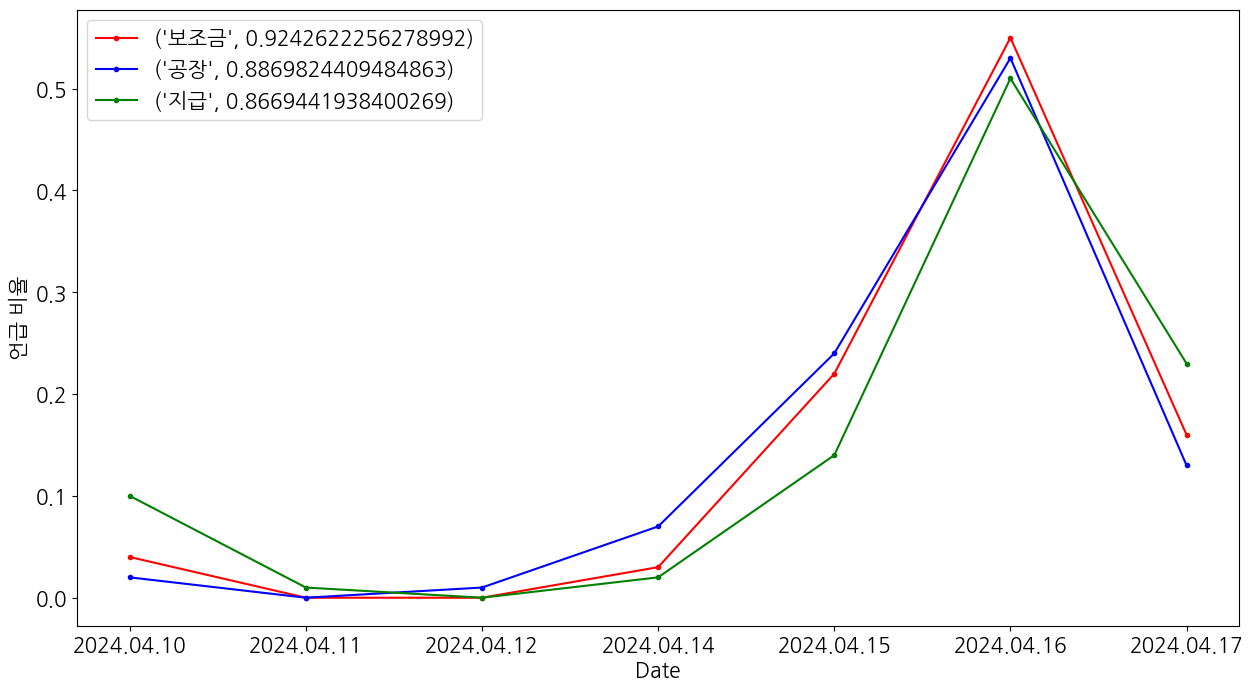

In [288]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic', size=15)
fig = plt.figure(figsize=(15, 8))
y1 = [m[0] for m in mentions]
y2 = [m[1] for m in mentions]
y3 = [m[2] for m in mentions]
x = date_df.index
plt.plot(x, y1, 'r.-', label=choice_word[0])
plt.plot(x, y2, 'b.-', label=choice_word[1])
plt.plot(x, y3, 'g.-', label=choice_word[2])
plt.xlabel('Date')
plt.ylabel('언급 비율')
plt.legend()
plt.show()

In [306]:
## 관련 기사 추천 하기 (추천 알고리즘)
import random
select_news = random.randint(0, len(total_df))
select_news
from sklearn.metrics.pairwise import cosine_similarity
similar = []
for i in range(len(total_df)):
    a = cosine_similarity(total_df.iloc[[select_news], 4:], total_df.iloc[[i], 4:])
    similar.append(a[0][0])
df['similar'] = similar
# df.head()
df.sort_values(['similar'], ascending=False, inplace=True)

df.loc[[select_news], ['date', 'title', 'url']]

,date,title,url
116,2024.04.15,삼성 반도체 보조금 9조원 받는다,https://n.news.naver.com/mnews/article/018/000...


In [307]:
df.iloc[:10, [0,1,3]]

,date,title,url
25,2024.04.14,단독 삼성전자 노조 집회장소에 꽃밭 만들기이런 전례 없다,https://n.news.naver.com/mnews/article/028/000...
94,2024.04.17,사설 K반도체 주력 생산 기지 미국으로 옮겨갈 수도,https://n.news.naver.com/mnews/article/023/000...
36,2024.04.10,개관 10돌 맞은 삼성이노베이션뮤지엄,https://n.news.naver.com/mnews/article/015/000...
40,2024.04.10,삼성전자 7년간 대리점 영업비밀 수집공정위 과징금 미부과 왜,https://n.news.naver.com/mnews/article/028/000...
89,2024.04.17,에 첨단 기술 뺏길라 9조 원 보조금에 담긴 K반도체 위험 신호들,https://n.news.naver.com/mnews/article/469/000...
153,2024.04.14,삼성 출시 2년 넘은 갤럭시S22도 갤럭시 AI 지원,https://n.news.naver.com/mnews/article/018/000...
211,2024.04.14,100조 잭팟 곧 터진다LG그룹 경영진 총출동한 까닭,https://n.news.naver.com/mnews/article/015/000...
122,2024.04.16,현실로 만든 테일러 프로젝트 삼성 반도체 반세기 꿈의 이정표,https://n.news.naver.com/mnews/article/014/000...
76,2024.04.16,삼성LG 밀라노 출격 139조원 유럽 가전 시장 잡아라,https://n.news.naver.com/mnews/article/020/000...
175,2024.04.16,갤럭시 S24 효과 삼성 스마트폰 출하량 1위 탈환,https://n.news.naver.com/mnews/article/023/000...
